In [1]:
!git clone https://github.com/UnderGroundVerse/Neural-Astar-using-Transformer.git

Cloning into 'Neural-Astar-using-Transformer'...


In [2]:
%cd Neural-Astar-using-Transformer

c:\Users\pc\Downloads\dddd\Neural-Astar-using-Transformer


In [3]:
!kaggle datasets download balraj98/deepglobe-road-extraction-dataset

Dataset URL: https://www.kaggle.com/datasets/balraj98/deepglobe-road-extraction-dataset
License(s): other
100% 3.79G/3.79G [00:45<00:00, 192MB/s]
100% 3.79G/3.79G [00:45<00:00, 88.7MB/s]


In [10]:
!unzip deepglobe-road-extraction-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/723199_sat.jpg    
  inflating: train/723226_mask.png   
  inflating: train/723226_sat.jpg    
  inflating: train/723436_mask.png   
  inflating: train/723436_sat.jpg    
  inflating: train/723483_mask.png   
  inflating: train/723483_sat.jpg    
  inflating: train/723622_mask.png   
  inflating: train/723622_sat.jpg    
  inflating: train/723722_mask.png   
  inflating: train/723722_sat.jpg    
  inflating: train/723970_mask.png   
  inflating: train/723970_sat.jpg    
  inflating: train/723990_mask.png   
  inflating: train/723990_sat.jpg    
  inflating: train/724095_mask.png   
  inflating: train/724095_sat.jpg    
  inflating: train/724431_mask.png   
  inflating: train/724431_sat.jpg    
  inflating: train/724485_mask.png   
  inflating: train/724485_sat.jpg    
  inflating: train/724705_mask.png   
  inflating: train/724705_sat.jpg    
  inflating: train/724870_mask.png   
  inflating: train/724870_sat.jpg    

In [48]:
import importlib
importlib.reload(rdxtractor)

<module 'RoadExtractor' from 'c:\\Users\\pc\\Downloads\\dddd\\Neural-Astar-using-Transformer\\RoadExtractor.py'>

In [55]:
import dataset as ds
import training
import RoadExtractor as rdxtractor
import numpy as np
import matplotlib.pyplot as plt

In [4]:
training_data = ds.load_metadata('./metadata.csv')

In [5]:
x_train_paths, y_train_paths = ds.load_images_paths(training_data)

In [6]:
x_train , y_train = ds.prepare_trainingdata(x_train_paths, y_train_paths)

In [7]:
test_images = ds.prepare_testdata('./test')

In [8]:
training.set_memory_growth() #Activate gpu for training with memory growth

Num GPUs Available:  1


In [49]:
rd_x = rdxtractor.RoadExtractor()
rd_x.build_model(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rd_x.summary()

Model: "road_extractor_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       multiple                  0         
                                                                 
 conv2d_377 (Conv2D)         (None, 256, 256, 32)      896       
                                                                 
 conv2d_378 (Conv2D)         (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 128, 128, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_379 (Conv2D)         (None, 128, 128, 64)      18496     
                                                                 
 conv2d_380 (Conv2D)         (None, 128, 128, 64)      36928     
                                                 

In [64]:
rd_x.load_weights('./trained_models/RoadExtractor-weights-118ep.h5') #For using a trained_model

ValueError: Layer count mismatch when loading weights from file. Model expected 20 layers, found 19 saved layers.

In [50]:
rd_x.fit(x_train, y_train ,epochs=200, batch_size=8) #For training

Epoch 1/200
250/250 [==============================] - 18s 40ms/step - loss: 0.3920 - accuracy: 0.8965
Epoch 2/200
250/250 [==============================] - 10s 40ms/step - loss: 0.1686 - accuracy: 0.9369
Epoch 3/200
250/250 [==============================] - 10s 39ms/step - loss: 0.1522 - accuracy: 0.9369
Epoch 4/200
250/250 [==============================] - 10s 39ms/step - loss: 0.1395 - accuracy: 0.9371
Epoch 5/200
250/250 [==============================] - 10s 39ms/step - loss: 0.1285 - accuracy: 0.9377
Epoch 6/200
250/250 [==============================] - 10s 39ms/step - loss: 0.1210 - accuracy: 0.9389
Epoch 7/200
250/250 [==============================] - 10s 40ms/step - loss: 0.1120 - accuracy: 0.9405
Epoch 8/200
250/250 [==============================] - 10s 40ms/step - loss: 0.1073 - accuracy: 0.9413
Epoch 9/200
250/250 [==============================] - 10s 39ms/step - loss: 0.1028 - accuracy: 0.9423
Epoch 10/200
250/250 [==============================] - 10s 39ms/step - l

KeyboardInterrupt: 

In [51]:
rd_x.save_model('RoadExtractor-weights-118ep')

(1, 256, 256, 3)


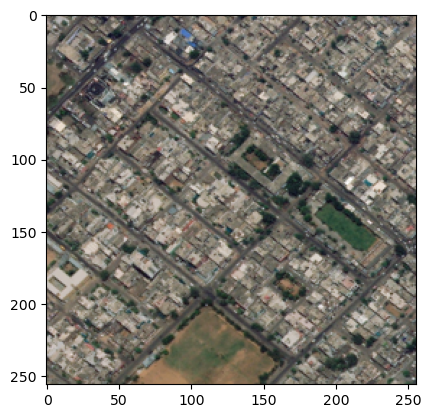

In [61]:

test_image = test_images[23]
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

plt.imshow(test_image[0])
plt.show()

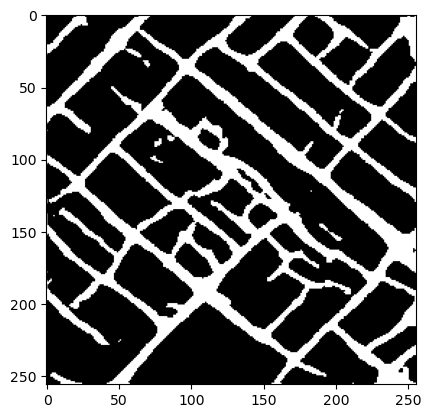

In [62]:
pred_image = rd_x.get_predction(test_image)
plt.imshow(pred_image , cmap='gray')
plt.show()